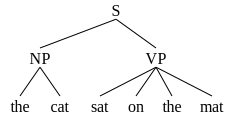

In [10]:
import nltk
from nltk.tree import Tree
prp = Tree

chunked = Tree("S", [Tree("NP", ["the", "cat"]), Tree("VP", ["sat", "on", "the", "mat"])])
chunked

In [11]:
PRP = Tree("PRP", ["I"])
VBD = Tree("VBD", ["met"])
N1 = Tree("NN", ["bill"])

NP1 = Tree("NP", [PRP])
NP = Tree("NP", [N1])
VP = Tree("VP", [VBD, NP])

S= Tree("s", [NP1, VP])

print(S)

(s (NP (PRP I)) (VP (VBD met) (NP (NN bill))))


In [12]:
S = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))")
print(S)

(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))


In [17]:
from nltk.corpus import treebank

# The function parsed_sents() returns the syntax trees in the treebank.
syntax_trees = treebank.parsed_sents()


In [30]:
from collections import Counter

def iterate_tree(t, ls=[]):
    """
    Recursively iterate through all nodes in a tree.
    """
    if isinstance(t, Tree) and t.height() > 2:
        print(t.label(), "---------")
        for child in t:
            iterate_tree(child, ls)
    else:
        ls.append(t.leaves()[0])
        
    return ls 

Counter(iterate_tree(treebank.parsed_sents()[11], [])).most_common(10)

SINV ---------
S-TPC-1 ---------
NP-SBJ ---------
VP ---------
NP ---------
NP ---------
PP ---------
SBAR ---------
S ---------
NP-SBJ ---------
VP ---------
PP-PRD ---------
NP ---------
VP ---------
S ---------
NP-SBJ ---------
NP ---------
PP ---------
NP ---------
NP ---------


[('``', 1),
 ('We', 1),
 ('have', 1),
 ('no', 1),
 ('useful', 1),
 ('information', 1),
 ('on', 1),
 ('whether', 1),
 ('users', 1),
 ('are', 1)]

In [14]:
for phrase in S.subtrees():
    print(phrase)
    print("---")

(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))
---
(NP (PRP I))
---
(PRP I)
---
(VP (VBD met) (NP (NN Bill)))
---
(VBD met)
---
(NP (NN Bill))
---
(NN Bill)
---


In [15]:
for phrase in S:
    print(phrase)
    print("---")

(NP (PRP I))
---
(VP (VBD met) (NP (NN Bill)))
---


In [41]:
S = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))) (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))")
S.leaves()

['I', 'met', 'Bill', 'I', 'met', 'Bill']

In [26]:
print(S.flatten())

(S I met Bill)


In [27]:
np = Tree("NP", [("I", "PRP")])
vp = Tree("VP", [("met", "VBD"), ("NP", [("Bill", "NN")])])

S= Tree("s", [NP1, VP])
print(S)

(s (NP (PRP I)) (VP (VBD met) (NP (NN bill))))


In [28]:
from nltk.corpus import treebank
syntax = treebank.parsed_sents()[0]
print(syntax)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


In [29]:
for phrase in syntax:
    print(phrase.label())

NP-SBJ
VP
.


In [30]:
for phrase in syntax:
    print(phrase,"--------------")

(NP-SBJ
  (NP (NNP Pierre) (NNP Vinken))
  (, ,)
  (ADJP (NP (CD 61) (NNS years)) (JJ old))
  (, ,)) --------------
(VP
  (MD will)
  (VP
    (VB join)
    (NP (DT the) (NN board))
    (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
    (NP-TMP (NNP Nov.) (CD 29)))) --------------
(. .) --------------


In [31]:
print(syntax.leaves())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


In [32]:
for phrase in syntax.subtrees():
    print(phrase)
    print("--------------")
    break

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
--------------


In [33]:
print(syntax.flatten())

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .)


In [34]:
def extract_phrases_from_sent(sentence, phrase_type):
    tokens = []
    for phrase in sentence:
        if phrase.label() == phrase_type:
            tokens.extend([tok.lower() for tok in phrase.leaves() if not "*" in tok])
        elif phrase.height() > 2:
            print(phrase.flatten(), phrase_type, "--------------------------")
            tokens.extend(extract_phrases_from_sent(phrase, phrase_type))
    return tokens

def extract_phrases(treebank, phrase_type):
    tokens = []
    #for s in treebank:
    tokens.extend(extract_phrases_from_sent(treebank,phrase_type))
    return tokens

from collections import Counter
first_sentence = treebank.parsed_sents()[:1]
np_sbj_types = Counter(extract_phrases(first_sentence,"NP-SBJ"))

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .) NP-SBJ --------------------------
(VP will join the board as a nonexecutive director Nov. 29) NP-SBJ --------------------------
(VP join the board as a nonexecutive director Nov. 29) NP-SBJ --------------------------
(NP the board) NP-SBJ --------------------------
(PP-CLR as a nonexecutive director) NP-SBJ --------------------------
(NP a nonexecutive director) NP-SBJ --------------------------
(NP-TMP Nov. 29) NP-SBJ --------------------------


In [35]:
np_sbj_types

Counter({'pierre': 1, 'vinken': 1, ',': 2, '61': 1, 'years': 1, 'old': 1})

In [36]:
np_sbj_types

Counter({'pierre': 1, 'vinken': 1, ',': 2, '61': 1, 'years': 1, 'old': 1})

In [37]:
np_sbj_types = Counter(extract_phrases(first_sentence,"NP"))
np_sbj_types

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .) NP --------------------------
(NP-SBJ Pierre Vinken , 61 years old ,) NP --------------------------
(ADJP 61 years old) NP --------------------------
(VP will join the board as a nonexecutive director Nov. 29) NP --------------------------
(VP join the board as a nonexecutive director Nov. 29) NP --------------------------
(PP-CLR as a nonexecutive director) NP --------------------------
(NP-TMP Nov. 29) NP --------------------------


Counter({'pierre': 1,
         'vinken': 1,
         '61': 1,
         'years': 1,
         'the': 1,
         'board': 1,
         'a': 1,
         'nonexecutive': 1,
         'director': 1})

In [38]:
#Tree.fromstring(first_sentence)

In [160]:
tree = Tree.fromstring("(S (NP (DT The) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))")
tree.pos()

[('The', 'DT'), ('dog', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('cat', 'NN')]

In [165]:
# your code here
def flatten_nps(tree):
    
    if tree.height() == 2:
        print("=====================", tree.pos()[0])
        return tree.pos()[0]
    elif tree.label() == "NP":
        print("-----------------------------------------------------------------", tree.pos())
        return Tree("NP",tree.pos())
    else: 
        print("+++++++++++++++++++", tree)
        return Tree(tree.label(),[flatten_nps(node) for node in tree])

print(flatten_nps(tree))

+++++++++++++++++++ (S (NP (DT The) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))
----------------------------------------------------------------- [('The', 'DT'), ('dog', 'NN')]
+++++++++++++++++++ (VP (VBD saw) (NP (DT the) (NN cat)))
===================== ('saw', 'VBD')
----------------------------------------------------------------- [('the', 'DT'), ('cat', 'NN')]
(S (NP The/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))


In [2]:
import nltk
from nltk.tree import Tree

In [5]:
np  = Tree("NP", ["the", "cat"])

In [6]:
vp  = Tree("VP", ["sat", "on", "the","mat"])

In [7]:
tree = Tree("S", [np,vp])

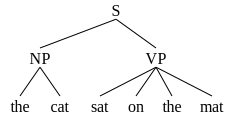

In [8]:
tree